## Wordcloud and Sentiment Analysis 

Here we propose to use a wordcloud to understand what triggers negative comments about a mobile application. You can find all the functions we have defined in the appchoose folder. 

**Import python modules**

In [21]:
%load_ext autoreload
%autoreload

from appchoose import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Import ratings data**

Correct and format the comments. Separate the negative comments from the positive ones.

In [22]:
ratings_android = pd.read_csv("google.csv") 
ratings_android = ratings_android[['author', 'comment', 'rate']]
ratings_iOS = pd.read_csv("itunes.csv")
ratings_iOS = ratings_iOS[['author', 'comment', 'rate']]
ratings = pd.concat([ratings_iOS, ratings_android])

ratings['comment'] = ratings['comment'].apply(utils.autocorrect)

negative_feedback = ratings[ratings['rate'] <= 2]

**Create a wordcloud**

The first thing we need to do is to define our own set of stopwords. You can download a list of predefined stopwords that are suitable for your task. As we are working with French comments, we will use French stopwords in this tutorial. The next step consists in retrieving the words of interest from all the comments.

In [23]:
fr_sw = utils.get_french_stopwords()
vocab = utils.create_vocab(ratings, fr_sw)

Now that we have defined our vocabulary, we can generate the corresponding wordcloud from the comments.

In [24]:
wc = utils.create_wordcloud(negative_feedback, vocab, fr_sw)

**Display the wordcloud**

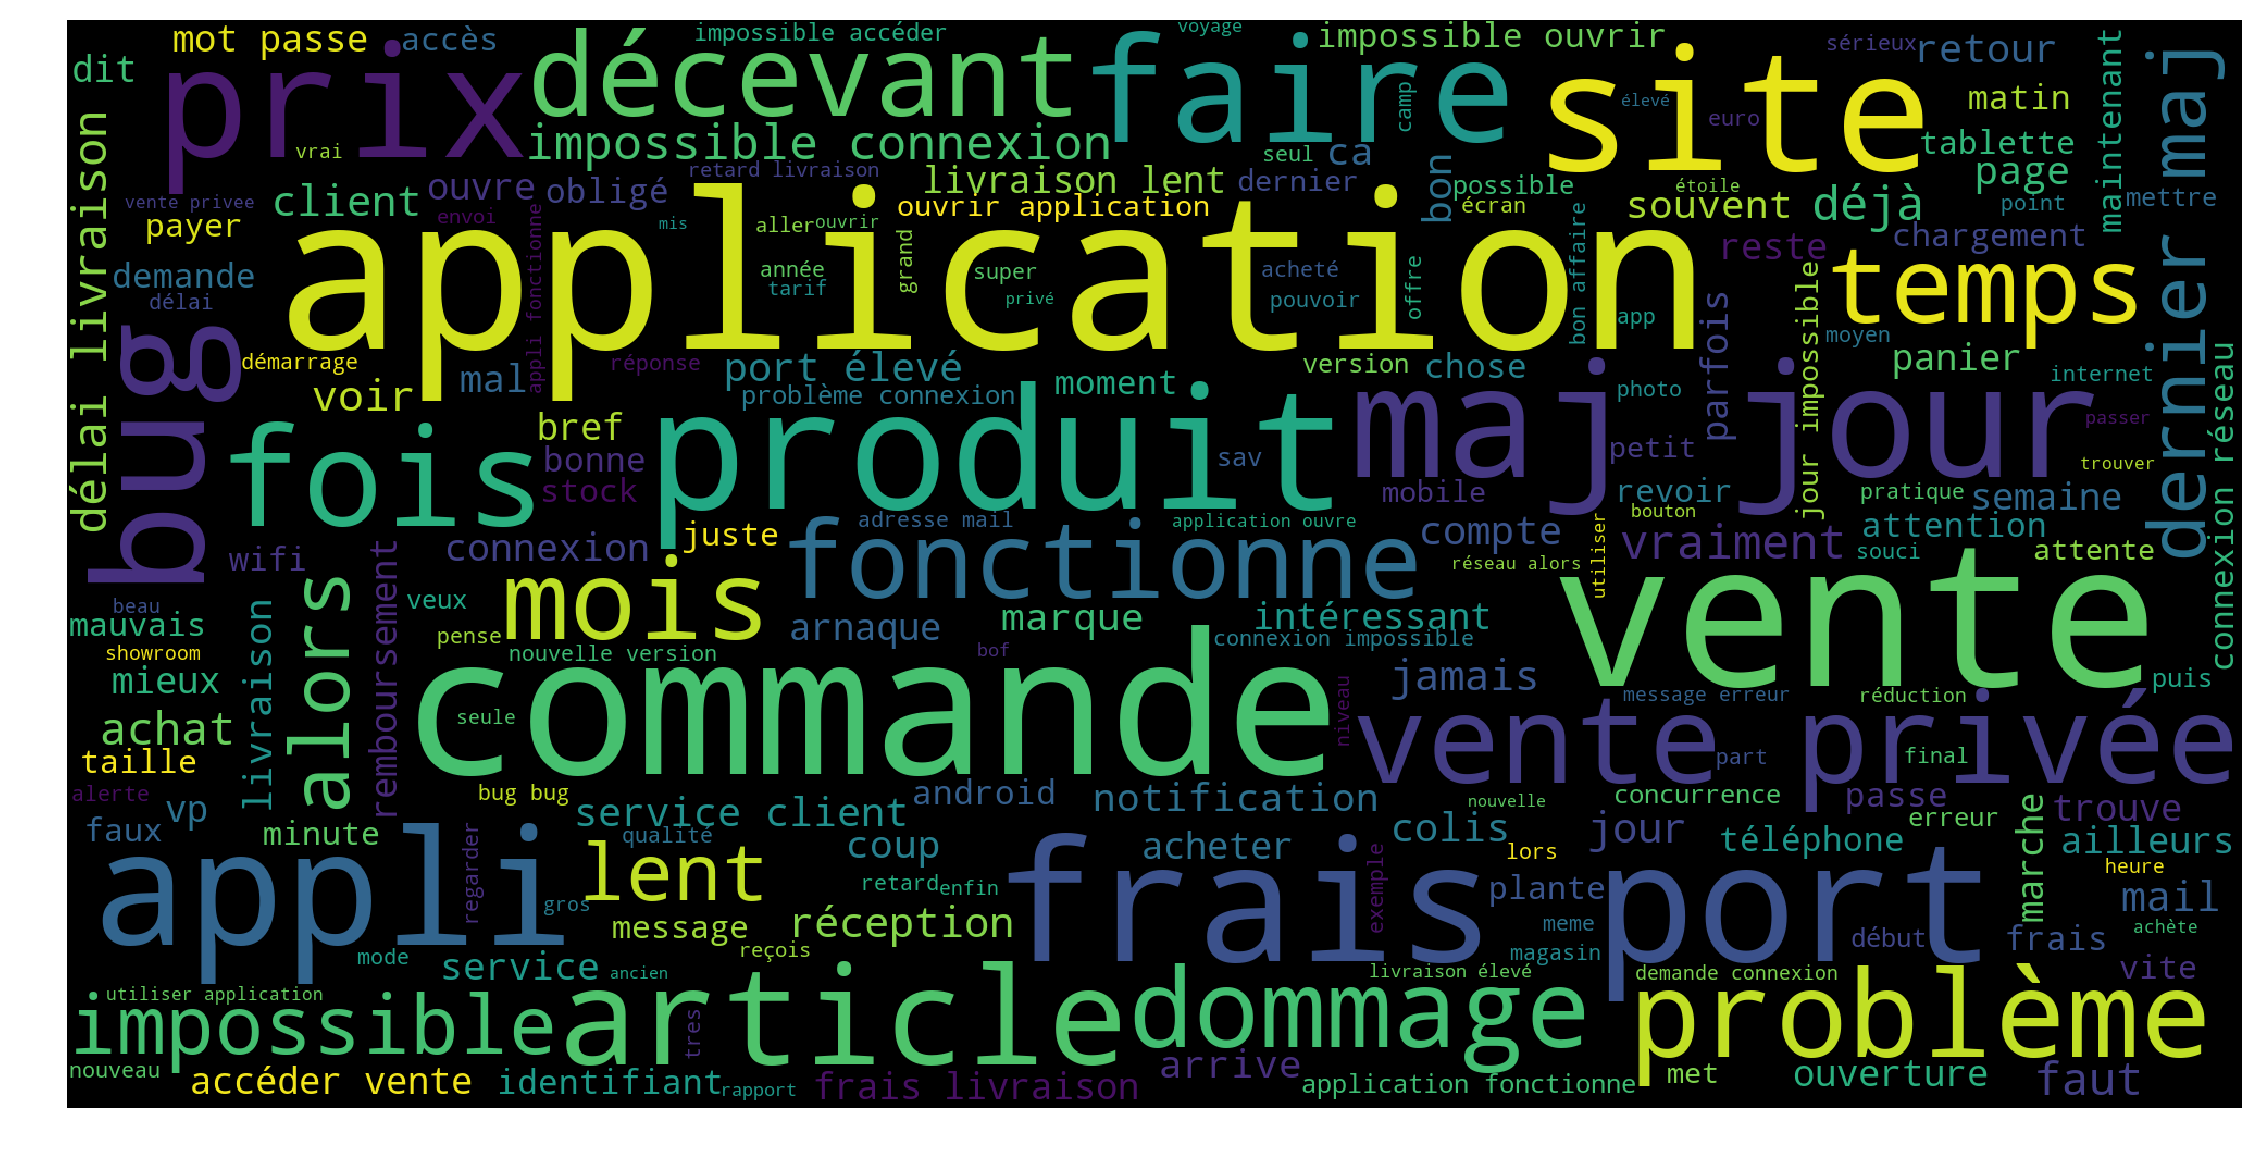

In [25]:
fig = plt.figure(figsize = (20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()